<a href="https://colab.research.google.com/github/ismailasy/Deep_IOT_Network_Anomaly_Detection/blob/main/Classification_multiclasse_6_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pour cette section nous allons essayer de faire une classification multiclasse en 5 classes:

1.   Normal
1.   MITM(attaque man in the midddle)
2.   Injection 
3.   Malware 
4.   DDos(Deni de service distribué)
5.   Vol d'informations






In [1]:
# Pour commencer nous allons importzr le jeu de données Iot dataset
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Datasets/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [2]:
# Affichage des types d'attaques 
print(df['Attack_type'].value_counts())

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


Pour commencer nous allons regroupper les categories d'attaques de meme type sur une seule classe

*   MITM 
*   Injection : XSS,SQL_injection,Uploading
*   Malware : Backdoor,Ransomware,Password 
*   DDoS(DDoS_UDP,DDoS_ICMP,DDoS_TCP,DDoS_HTTP )
*   Vol d'informations :Port_Scanning,Vulnerability_scanner,Fingerprinting              



Passons maintenant a la phase de pretraitemant des donnes

In [3]:
df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,...,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06
mean,3.323268e-03,1.582732e-02,1.730285e+03,1.893064e+03,2.877556e+03,0.0,4.808231e+00,1.469132e-02,0.0,2.278400e+07,...,1.982731e+00,0.0,7.481643e-01,1.496665e-01,8.977934e-01,1.496665e-01,1.297764e-03,5.170780e-03,9.417804e-05,2.719709e-01
std,6.843237e-02,3.077555e-01,8.526581e+03,8.870474e+03,4.705188e+05,0.0,9.642259e+01,1.203142e-01,0.0,1.649033e+08,...,7.648797e+00,0.0,2.701086e+00,7.591219e-01,4.554231e+00,7.591219e-01,1.711483e-01,7.226807e-01,1.377313e-02,4.449751e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,5.900000e+01,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,6.553300e+04,6.553500e+04,7.728902e+07,0.0,8.365500e+04,1.000000e+00,0.0,3.949529e+09,...,3.900000e+01,0.0,1.400000e+01,4.000000e+00,2.400000e+01,4.000000e+00,2.700000e+01,1.510000e+02,6.000000e+00,1.000000e+00


In [4]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

In [5]:
df.drop(drop_columns, axis=1, inplace=True)

In [6]:
df.drop('mqtt.topic',axis=1,inplace=True)

In [7]:
#Suppression des Nan
df.dropna(axis=0, how='any', inplace=True)

In [8]:
# On supprime les données lignes dupliqués
df.drop_duplicates(subset=None, keep="first", inplace=True)

In [9]:
print(df['Attack_type'].value_counts())

Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: Attack_type, dtype: int64


In [10]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,MQTT,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219162,0.0,0.0,35149.0,43815.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219167,0.0,0.0,54603.0,44251.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219181,0.0,0.0,48711.0,45298.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219192,0.0,0.0,60230.0,45509.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [11]:
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,MQTT,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0,24.0,0.0,0.0,0.0,0.0,0,Normal


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909671 entries, 0 to 2219193
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                float64
 13  tcp.checksum               float64
 14  tcp.connection.fin         float64
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  float64
 19  tcp.flags.ack              float64
 20  tc

In [ ]:
#Normal
#MITM 
#Injection : XSS,SQL_injection,Uploading
#Malware : Backdoor,Ransomware,Password 
#DDoS(DDoS_UDP,DDoS_ICMP,DDoS_TCP,DDoS_HTTP )
#Vol_informations :Port_Scanning,Vulnerability_scanner,Fingerprinting              

In [13]:
df['Attack_type']= df['Attack_type'].map({'Normal':'Normal','DDoS_UDP':'DDoS','DDoS_ICMP':'DDoS','SQL_injection':'Injection','Password':'Malware',
       'Vulnerability_scanner':'Vol_informations','DDoS_TCP':'DDoS','DDoS_HTTP':'DDoS','Uploading':'Injection','Backdoor':'Malware','Port_Scanning':'Vol_informations','XSS':'Injection',
       'Ransomware':'Malware','MITM':'MITM','Fingerprinting':'Vol_informations'},
      na_action=None)

In [14]:
# Affichage des types d'attaques 
print(df['Attack_type'].value_counts())

Normal              1363998
DDoS                 288112
Injection            102699
Malware               83648
Vol_informations      70856
MITM                    358
Name: Attack_type, dtype: int64


In [15]:
y = df['Attack_type']

In [16]:
y = df['Attack_type']
values = np.unique(y,return_counts=True)

In [17]:
y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
            ...  
2219162      DDoS
2219167      DDoS
2219181      DDoS
2219192      DDoS
2219193      DDoS
Name: Attack_type, Length: 1909671, dtype: object

In [18]:
values

(array(['DDoS', 'Injection', 'MITM', 'Malware', 'Normal',
        'Vol_informations'], dtype=object),
 array([ 288112,  102699,     358,   83648, 1363998,   70856]))

In [19]:
class_names= ['DDoS', 'Injection', 'MITM', 'Malware', 'Normal',
        'Vol_informations']

In [20]:
labels = class_names
sizes = values[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


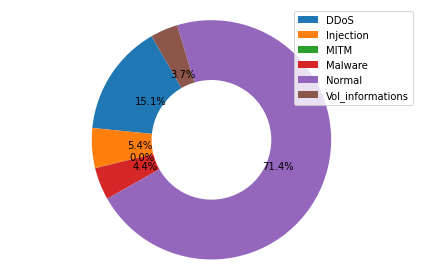

In [21]:
#tracage de la distribution des categories
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%', startangle=120)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels =labels)
plt.show()

In [22]:
#fonction d'encodage des variable
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

In [23]:
encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909671 entries, 0 to 2219193
Data columns (total 94 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                          

In [25]:
# Affichage des types d'attaques 
print(df['Attack_type'].value_counts())

Normal              1363998
DDoS                 288112
Injection            102699
Malware               83648
Vol_informations      70856
MITM                    358
Name: Attack_type, dtype: int64


In [26]:
y= y.map({'Normal':0,'DDoS':1,'Injection':2,'Malware':3,'Vol_informations':4,
       'MITM':5},
      na_action=None)

In [27]:
y

0          0
1          0
2          0
3          0
4          0
          ..
2219162    1
2219167    1
2219181    1
2219192    1
2219193    1
Name: Attack_type, Length: 1909671, dtype: int64

In [28]:
dummies = pd.get_dummies(y) 
y = dummies.values

In [29]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [30]:
X = df

In [31]:
X.shape

(1909671, 94)

In [32]:
X.drop('Attack_type',axis=1,inplace=True)
X.drop('Attack_label',axis=1,inplace=True)

In [33]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)

In [34]:
#Separation en train et test set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X2, y,
                                                test_size = 0.3 ,stratify=y)

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import RNN,Activation

model_lstm = Sequential() 
model_lstm.add(LSTM(units = 32, return_sequences = True, input_shape = (xtrain.shape[1],1)))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Flatten())
model_lstm.add(Dense(6, activation='softmax'))
model_lstm.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'] )
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 92, 32)            4352      
                                                                 
 dense (Dense)               (None, 92, 64)            2112      
                                                                 
 dense_1 (Dense)             (None, 92, 64)            4160      
                                                                 
 dropout (Dropout)           (None, 92, 64)            0         
                                                                 
 flatten (Flatten)           (None, 5888)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 35334     
                                                                 
Total params: 45,958
Trainable params: 45,958
Non-traina

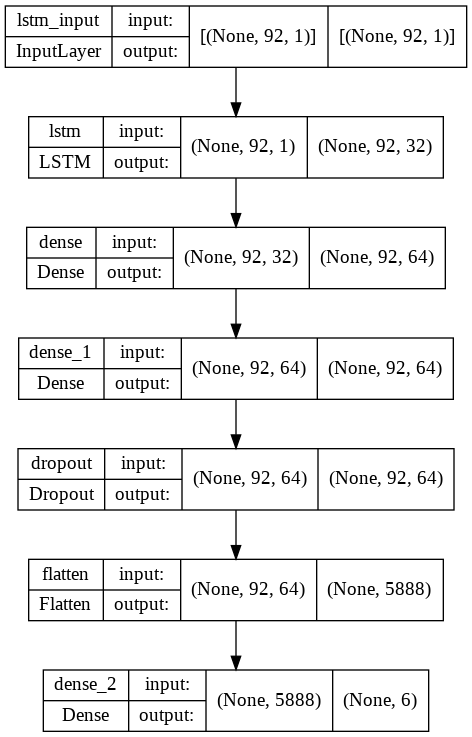

In [36]:
from keras.utils.vis_utils import plot_model

plot_model(model_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
history_lstm = model_lstm.fit(
    xtrain,
    ytrain,
    validation_split = 0.1,
    epochs = 20,
    batch_size = 2048
)

Epoch 1/20
588/588 [==============================] - 16s 26ms/step - loss: 0.0820 - accuracy: 0.9592 - val_loss: 0.0810 - val_accuracy: 0.9597
Epoch 2/20
588/588 [==============================] - 16s 26ms/step - loss: 0.0814 - accuracy: 0.9595 - val_loss: 0.0806 - val_accuracy: 0.9598
Epoch 3/20
588/588 [==============================] - 16s 28ms/step - loss: 0.0809 - accuracy: 0.9599 - val_loss: 0.0814 - val_accuracy: 0.9607
Epoch 4/20
588/588 [==============================] - 15s 26ms/step - loss: 0.0802 - accuracy: 0.9601 - val_loss: 0.0803 - val_accuracy: 0.9605
Epoch 5/20
588/588 [==============================] - 16s 27ms/step - loss: 0.0796 - accuracy: 0.9603 - val_loss: 0.0792 - val_accuracy: 0.9609
Epoch 6/20
588/588 [==============================] - 16s 26ms/step - loss: 0.0799 - accuracy: 0.9602 - val_loss: 0.0779 - val_accuracy: 0.9609
Epoch 7/20
588/588 [==============================] - 16s 27ms/step - loss: 0.0786 - accuracy: 0.9606 - val_loss: 0.0776 - val_accuracy:

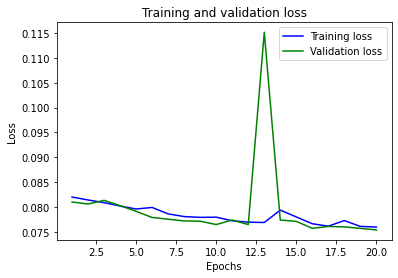

In [41]:
import matplotlib.pyplot as plt

plt.clf()
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

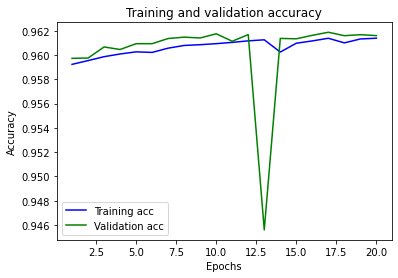

In [42]:
plt.clf()
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
from sklearn import metrics
y_pred = model_lstm.predict(xtest)
y_pred = np.argmax(y_pred,axis=1) 
y_true = np.argmax(ytest,axis=1)

In [44]:
y_pred

array([3, 1, 0, ..., 2, 0, 0])

In [45]:
y_true

array([3, 1, 0, ..., 3, 0, 0])

In [46]:
from sklearn.metrics import multilabel_confusion_matrix
cm_ml =multilabel_confusion_matrix(y_true, y_pred)


In [48]:
cm_ml

array([[[163702,      0],
        [     0, 409200]],

       [[478047,   8421],
        [   672,  85762]],

       [[529009,  13083],
        [  3282,  27528]],

       [[547495,    313],
        [ 12473,  12621]],

       [[551470,    175],
        [  5565,  15692]],

       [[572795,      0],
        [     0,    107]]])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    409200
           1       0.91      0.99      0.95     86434
           2       0.68      0.89      0.77     30810
           3       0.98      0.50      0.66     25094
           4       0.99      0.74      0.85     21257
           5       1.00      1.00      1.00       107

    accuracy                           0.96    572902
   macro avg       0.93      0.85      0.87    572902
weighted avg       0.97      0.96      0.96    572902



In [50]:
cm = metrics.confusion_matrix(y_true, y_pred)

In [51]:
cm

array([[409200,      0,      0,      0,      0,      0],
       [     0,  85762,    503,      1,    168,      0],
       [     0,   3027,  27528,    248,      7,      0],
       [     0,    229,  12244,  12621,      0,      0],
       [     0,   5165,    336,     64,  15692,      0],
       [     0,      0,      0,      0,      0,    107]])

In [52]:
classes= ['Normal', 'DDoS', 'Injection', 'Malware', 'Vol_informations',
        'MITM']

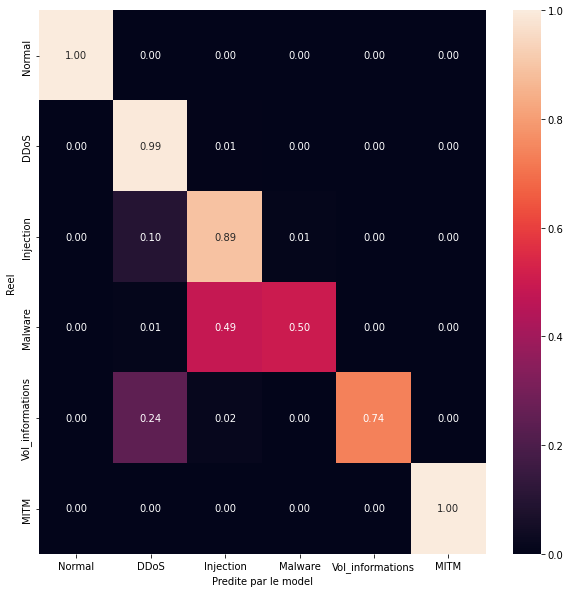

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes)
plt.ylabel('Reel ')
plt.xlabel('Predite par le model')
plt.show(block=False)